# Before you start :
   - These exercises are related to the Subsetting and Descriptive Stats lessons.
   - Keep in mind that you need to use some of the functions you learned in the previous lessons.
   - All datasets are provided in the `your-code` folder of this lab.
   - Elaborate your codes and outputs as much as you can.
   - Try your best to answer the questions and complete the tasks and most importantly enjoy the process!!!

#### Import all the libraries that are necessary

In [43]:
import pandas as pd

In [44]:
import numpy as np

In [45]:
import seaborn as sns

# Challenge 1

#### In this challenge we will use the `Temp_States.csv` file. 

#### First import it into a data frame called `temp`.

In [46]:
df=pd.read_csv('Temp_States.csv')

#### Print `temp`

In [47]:
df.head()

,City,State,Temperature
0,NYC,New York,19.444444
1,Albany,New York,9.444444
2,Buffalo,New York,3.333333
3,Hartford,Connecticut,17.222222
4,Bridgeport,Connecticut,14.444444


#### Explore the data types of the Temp dataframe. What type of data do we have? Comment your result.

In [48]:
# your answer here
df.info(memory_usage='deep')

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7 entries, 0 to 6
Data columns (total 3 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   City         7 non-null      object 
 1   State        7 non-null      object 
 2   Temperature  7 non-null      float64
dtypes: float64(1), object(2)
memory usage: 1.1 KB


In [49]:
df.shape

(7, 3)

In [50]:
df.Temperature.describe()

count     7.000000
mean     15.158730
std       6.695265
min       3.333333
25%      11.944444
50%      17.222222
75%      19.722222
max      22.222222
Name: Temperature, dtype: float64

#### Select the rows where state is New York

In [51]:
new_york_df = df[df['State'] == 'New York']
print(new_york_df)

      City     State  Temperature
0      NYC  New York    19.444444
1   Albany  New York     9.444444
2  Buffalo  New York     3.333333


#### What is the average of the temperature of cities in New York?

In [52]:
temperatura_media = df[df['State'] == 'New York']['Temperature'].mean()
print(temperatura_media)


10.74074074074074


#### We want to know cities and states with Temperature above 15 degress Celcius

In [53]:
# Ciudades con temperatura mayor a 15 grados
filtered_cities = df[df['Temperature'] > 15]['City'].tolist()
print(filtered_cities)


# Estados con temperatura mayor a 15 grados
filtered_states = df[df['Temperature'] > 15]['State'].tolist()
print(filtered_states)


['NYC', 'Hartford', 'Treton', 'Newark']
['New York', 'Connecticut', 'New Jersey', 'New Jersey']


#### Now, return only the cities that have a temperature above 15 degress Celcius

In [54]:

filtered_cities = df[df['Temperature'] > 15]['City'].tolist()
print(filtered_cities)

['NYC', 'Hartford', 'Treton', 'Newark']


#### We want to know which cities have a temperature above 15 degrees Celcius and below 20 degrees Celcius

*Hint: First write the condition then select the rows.*

In [55]:
filtered_cities = df[(df['Temperature'] > 15) & (df['Temperature'] < 20)]['City'].tolist()
print(filtered_cities)


['NYC', 'Hartford']


#### Find the mean and the standard deviation of the temperature of each state.

*Hint: Use functions from Data Manipulation lesson*

In [56]:
resumen_por_estado = df.groupby('State').agg({'Temperature': ['mean', 'std']})
print(resumen_por_estado)


            Temperature          
                   mean       std
State                            
Connecticut   15.833333  1.964186
New Jersey    21.111111  1.571348
New York      10.740741  8.133404


# Challenge 2

#### Load the `employee.csv` file into a DataFrame. Call the dataframe `employee`

In [57]:
df2=pd.read_csv('employee.csv')

#### Explore the data types of the Temp dataframe. Comment your results

In [58]:
df2.info


<bound method DataFrame.info of      Name Department Education Gender      Title  Years  Salary
0    Jose         IT  Bachelor      M    analyst      1      35
1   Maria         IT    Master      F    analyst      2      30
2   David         HR    Master      M    analyst      2      30
3   Sonia         HR  Bachelor      F    analyst      4      35
4  Samuel      Sales    Master      M  associate      3      55
5     Eva      Sales  Bachelor      F  associate      2      55
6  Carlos         IT    Master      M         VP      8      70
7   Pedro         IT       Phd      M  associate      7      60
8     Ana         HR    Master      F         VP      8      70>

In [66]:
df2.head()

,Name,Department,Education,Gender,Title,Years,Salary
0,Jose,IT,Bachelor,M,analyst,1,35
1,Maria,IT,Master,F,analyst,2,30
2,David,HR,Master,M,analyst,2,30
3,Sonia,HR,Bachelor,F,analyst,4,35
4,Samuel,Sales,Master,M,associate,3,55


In [67]:
df.shape

(7, 3)

#### Show visually the frequency distribution (histogram) of the employee dataset. In few words describe these histograms?

In [68]:
import matplotlib.pyplot as plt

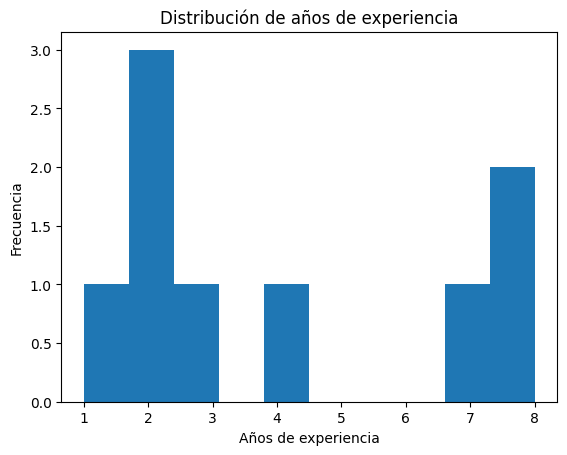

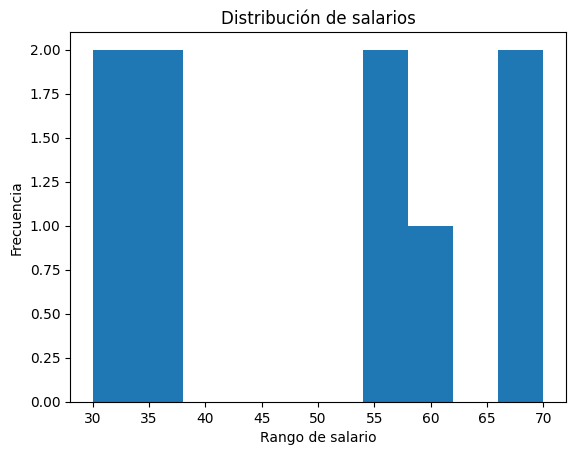

In [71]:
plt.hist(df2['Years'])

plt.title('Distribución de años de experiencia')
plt.xlabel('Años de experiencia')
plt.ylabel('Frecuencia')
plt.show()

plt.hist(df2['Salary'])

plt.title('Distribución de salarios')
plt.xlabel('Rango de salario')
plt.ylabel('Frecuencia')
plt.show()

#### What's the average salary in this company?

In [73]:
media_salario = df2['Salary'].mean()
print(media_salario)

48.888888888888886


#### What's the highest salary?

In [75]:
max_salario = df2['Salary'].max()
max_salario

70

#### What's the lowest salary?

In [76]:
min_salario = df2['Salary'].min()
min_salario


30

#### Who are the employees with the lowest salary?

In [80]:
# Ordeno por salario
df2_sorted = df2.sort_values('Salary')

# Selecciono empleados con menos salario
empleados_menos_salario = df2_sorted.head()
print(empleados_menos_salario)

     Name Department Education Gender      Title  Years  Salary
1   Maria         IT    Master      F    analyst      2      30
2   David         HR    Master      M    analyst      2      30
0    Jose         IT  Bachelor      M    analyst      1      35
3   Sonia         HR  Bachelor      F    analyst      4      35
4  Samuel      Sales    Master      M  associate      3      55


#### Could you give all the information about an employee called David?

In [82]:
david_info = df2.loc[df2['Name'] == 'David']
print(david_info)


    Name Department Education Gender    Title  Years  Salary
2  David         HR    Master      M  analyst      2      30


#### Could you give only David's salary?

In [84]:
salary_david = df2.loc[df2['Name'] == 'David']['Salary'].values[0]
print(salary_david)


30


#### Print all the rows where job title is associate

In [87]:
df_associates = df2[df2['Title'].str.contains('associate', case=False)]
df_associates

,Name,Department,Education,Gender,Title,Years,Salary
4,Samuel,Sales,Master,M,associate,3,55
5,Eva,Sales,Bachelor,F,associate,2,55
7,Pedro,IT,Phd,M,associate,7,60


#### Print the first 3 rows of your dataframe

##### Tip : There are 2 ways to do it. Do it both ways

In [89]:
df2.head(3)


,Name,Department,Education,Gender,Title,Years,Salary
0,Jose,IT,Bachelor,M,analyst,1,35
1,Maria,IT,Master,F,analyst,2,30
2,David,HR,Master,M,analyst,2,30


In [90]:
df2[:3]


,Name,Department,Education,Gender,Title,Years,Salary
0,Jose,IT,Bachelor,M,analyst,1,35
1,Maria,IT,Master,F,analyst,2,30
2,David,HR,Master,M,analyst,2,30


#### Find the employees who's title is associate and the salary above 55?

In [91]:
empleados_filtrados = df2.loc[(df2["Title"] == "associate") & (df2["Salary"] > 55)]
empleados_filtrados


,Name,Department,Education,Gender,Title,Years,Salary
7,Pedro,IT,Phd,M,associate,7,60


#### Group the employees based on their number of years of employment. What are the average salaries in each group?

In [94]:
# agrupamos los empleados según su experiencia
grupos_años = df2.groupby('Years')

# aplicamos una función de agregación, en este caso la media, para obtener estadísticas sobre cada grupo
estadisticas = grupos_años['Salary'].agg('mean')
estadisticas

Years
1    35.000000
2    38.333333
3    55.000000
4    35.000000
7    60.000000
8    70.000000
Name: Salary, dtype: float64


####  What is the average Salary per title?

In [96]:
# Agrupamos los datos por 'Title' y calculamos la media de los salarios
media_salario = df2.groupby('Title')['Salary'].mean()
media_salario

Title
VP           70.000000
analyst      32.500000
associate    56.666667
Name: Salary, dtype: float64

#### Show a visual summary of the data using boxplot. What Are the First and Third Quartiles? Comment your results.
##### * Hint : Quantiles vs Quartiles*
##### - `In Probability and Statistics, quantiles are cut points dividing the range of a probability distribution into continuous intervals with equal probabilities. When division is into four parts the values of the variate corresponding to 25%, 50% and 75% of the total distribution are called quartiles.`

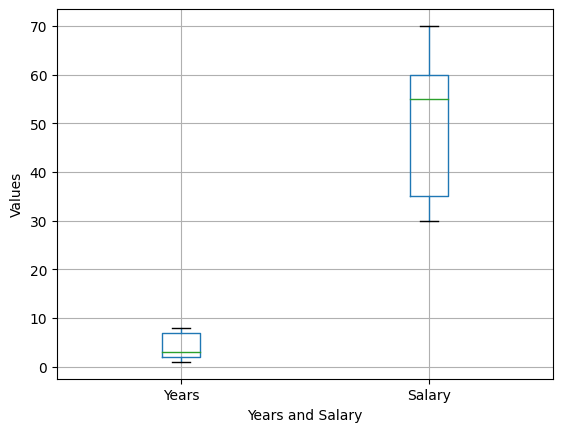

In [104]:
df2.boxplot(column=['Years', 'Salary'])
plt.xlabel("Years and Salary")
plt.ylabel("Values")
plt.show()

In [105]:
q1 = np.percentile(df2, 25)

TypeError: '<' not supported between instances of 'int' and 'str'

In [28]:
# print third quartile here

#### Is the mean salary per gender different?

In [111]:
datos_mujeres = df2.loc[df2['Gender'] == 'F']
media_salario_mujeres = datos_mujeres['Salary'].mean()
print(media_salario_mujeres)

datos_hombres = df2.loc[df2['Gender'] == 'M']
media_salario_hombres = datos_hombres['Salary'].mean()
print(media_salario_hombres)

47.5
50.0


#### Find the minimum, mean and the maximum of all numeric columns for each Department.

##### Hint: Use functions from Data Manipulation lesson

In [116]:
# este lo he hecho con el chat porque no lo entiendo

grupos_departamentos = df2.groupby('Department')
for nombre_depto, grupo_depto in grupos_departamentos:
    print(f"Estadísticas del departamento {nombre_depto}:")
    numeros = grupo_depto.select_dtypes(include=[float, int])
    print(f"  Máximo: {numeros.max()}")
    print(f"  Mínimo: {numeros.min()}")
    print(f"  Media: {numeros.mean()}")

Estadísticas del departamento HR:
  Máximo: Years      8
Salary    70
dtype: int64
  Mínimo: Years      2
Salary    30
dtype: int64
  Media: Years      4.666667
Salary    45.000000
dtype: float64
Estadísticas del departamento IT:
  Máximo: Years      8
Salary    70
dtype: int64
  Mínimo: Years      1
Salary    30
dtype: int64
  Media: Years      4.50
Salary    48.75
dtype: float64
Estadísticas del departamento Sales:
  Máximo: Years      3
Salary    55
dtype: int64
  Mínimo: Years      2
Salary    55
dtype: int64
  Media: Years      2.5
Salary    55.0
dtype: float64


### Bonus Question

#### For each department, compute the difference between the maximal salary and the minimal salary.

##### * Hint: try using `agg` or `apply` and `lambda`*

In [32]:
# your answer here

# Challenge 3

#### Open the Orders.csv dataset. Name your dataset orders

In [119]:
df=pd.read_csv('Orders.csv')
df.head()

,Unnamed: 0,InvoiceNo,StockCode,year,month,day,hour,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,amount_spent
0,0,536365,85123A,2010,12,3,8,white hanging heart t-light holder,6,2010-12-01 08:26:00,2.55,17850,United Kingdom,15.30
1,1,536365,71053,2010,12,3,8,white metal lantern,6,2010-12-01 08:26:00,3.39,17850,United Kingdom,20.34
2,2,536365,84406B,2010,12,3,8,cream cupid hearts coat hanger,8,2010-12-01 08:26:00,2.75,17850,United Kingdom,22.00
3,3,536365,84029G,2010,12,3,8,knitted union flag hot water bottle,6,2010-12-01 08:26:00,3.39,17850,United Kingdom,20.34
4,4,536365,84029E,2010,12,3,8,red woolly hottie white heart.,6,2010-12-01 08:26:00,3.39,17850,United Kingdom,20.34


#### Explore your dataset by looking at the data types and the summary statistics. Comment your results

In [120]:
df.info

<bound method DataFrame.info of         Unnamed: 0  InvoiceNo StockCode  year  month  day  hour   
0                0     536365    85123A  2010     12    3     8  \
1                1     536365     71053  2010     12    3     8   
2                2     536365    84406B  2010     12    3     8   
3                3     536365    84029G  2010     12    3     8   
4                4     536365    84029E  2010     12    3     8   
...            ...        ...       ...   ...    ...  ...   ...   
397919      541904     581587     22613  2011     12    5    12   
397920      541905     581587     22899  2011     12    5    12   
397921      541906     581587     23254  2011     12    5    12   
397922      541907     581587     23255  2011     12    5    12   
397923      541908     581587     22138  2011     12    5    12   

                                Description  Quantity          InvoiceDate   
0        white hanging heart t-light holder         6  2010-12-01 08:26:00  \
1      

In [121]:
df.shape

(397924, 14)

####  What is the average Purchase Price?

In [123]:
media_unit_price = df["UnitPrice"].mean()
media_unit_price

3.1161744805540756

#### What were the highest and lowest purchase prices? 

In [125]:
max_unit_price = df["UnitPrice"].max()
max_unit_price

8142.75

In [126]:
min_unit_price = df["UnitPrice"].min()
min_unit_price

0.0

#### Select all the customers we have in Spain

In [128]:
clientes_espana = df.loc[df["Country"] == "Spain", "CustomerID"]
clientes_espana

4250      12557
4251      12557
4252      12557
4253      12557
4254      12557
          ...  
394733    17097
394734    17097
394735    17097
394736    17097
394737    17097
Name: CustomerID, Length: 2485, dtype: int64

#### How many customers do we have in Spain?
##### Hint : Use value_counts()

In [129]:
len(clientes_espana)

2485

#### Select all the customers who have bought more than 50 items ?

In [134]:
filtered_customers = df[df['Quantity'] > 50]['CustomerID'].tolist()
filtered_customers

[13748,
 15291,
 14688,
 14688,
 16029,
 16029,
 16029,
 16029,
 16029,
 16029,
 16029,
 17511,
 17511,
 17511,
 17511,
 17511,
 17511,
 17511,
 17511,
 17511,
 13408,
 13408,
 13408,
 13408,
 12791,
 14045,
 13255,
 13694,
 13694,
 13694,
 16210,
 16210,
 16210,
 16210,
 17181,
 17181,
 15485,
 12433,
 12433,
 12433,
 18144,
 13093,
 17760,
 17025,
 13777,
 13777,
 13777,
 13777,
 13777,
 13777,
 13777,
 13777,
 13777,
 13777,
 13777,
 13777,
 13777,
 13777,
 13777,
 13777,
 13777,
 13777,
 13777,
 13777,
 13777,
 13777,
 13777,
 13777,
 13576,
 17925,
 13941,
 13941,
 13941,
 13941,
 13941,
 14135,
 14135,
 14135,
 14135,
 14135,
 13108,
 18041,
 14060,
 14060,
 14060,
 15738,
 17381,
 17381,
 17381,
 17381,
 17381,
 17381,
 17685,
 15061,
 15061,
 15061,
 15061,
 15061,
 15061,
 15061,
 15061,
 15061,
 15061,
 15061,
 15061,
 15061,
 15061,
 15061,
 15061,
 15061,
 15061,
 15061,
 15061,
 15061,
 15061,
 15061,
 15061,
 15061,
 15061,
 15061,
 15061,
 15061,
 15061,
 15061,
 15061,


#### Select orders from Spain that are above 50 items

In [137]:
facturas_espana = df.loc[(df["Country"] == "Spain") & (df["Quantity"] > 50), "InvoiceNo"]
facturas_espana

4250      536944
4251      536944
4252      536944
4253      536944
4254      536944
32454     540785
32455     540785
32456     540785
32457     540785
91155     547972
91156     547972
91159     547972
174442    558871
174443    558871
174444    558871
174445    558871
174446    558871
174447    558871
174448    558871
174449    558871
197167    561669
197168    561669
197169    561669
197170    561669
197171    561669
224881    564734
254097    567968
289129    571255
289134    571255
289142    571255
289143    571255
295956    571851
312655    573362
312656    573362
312657    573362
366326    578321
366327    578321
366328    578321
366329    578321
Name: InvoiceNo, dtype: int64

#### Select all free orders

In [138]:
gratis = df.loc[df["UnitPrice"] == 0, "InvoiceNo"]
gratis

6914      537197
22539     539263
25379     539722
29080     540372
29082     540372
34494     541109
53788     543599
85671     547417
92875     548318
97430     548871
107192    550188
128641    553000
137127    554037
194648    561284
197173    561669
199711    561916
208950    562973
223931    564651
223932    564651
223933    564651
223934    564651
256263    568158
259399    568384
273926    569716
286507    571035
307092    572893
319882    574138
320049    574175
320407    574252
322279    574469
328385    574879
329006    574920
329007    574920
334242    575579
334243    575579
352746    577129
353097    577168
354170    577314
358629    577696
370473    578841
Name: InvoiceNo, dtype: int64

#### Select all orders that are 'lunch bag'
#### Hint: Use string functions

In [139]:
facturas_lunch_bag = df.loc[df["Description"].str.contains("lunch bag", case=False), "InvoiceNo"]
facturas_lunch_bag

93        536378
172       536385
354       536401
359       536401
360       536401
           ...  
397465    581486
397713    581538
397714    581538
397877    581581
397880    581583
Name: InvoiceNo, Length: 11556, dtype: int64

#### Select all orders that are made in 2011 and are 'lunch bag'  

In [144]:
facturas_lunch_bag_2011 = df.loc[(df["year"] == 2011) & (df["Description"].str.contains("lunch bag", case=False)), "InvoiceNo"]
facturas_lunch_bag_2011

26340     540015
26341     540015
26512     540023
26513     540023
26860     540098
           ...  
397465    581486
397713    581538
397714    581538
397877    581581
397880    581583
Name: InvoiceNo, Length: 11234, dtype: int64

#### Show the frequency distribution of the amount spent in Spain.

In [146]:
freq_dist = pd.value_counts(df[df['Country'] == 'Spain']['amount_spent']).sort_index()
print(freq_dist)

amount_spent
0.00       1
0.21       3
0.29       1
0.39       3
0.42       1
          ..
417.50     1
488.16     2
1080.00    1
1220.40    2
1350.00    3
Name: count, Length: 316, dtype: int64


#### Select all orders made in the month of August

In [147]:
invoice_numbers = df.loc[df['month'] == 5, 'InvoiceNo']
invoice_numbers

117141    551515
117142    551515
117143    551515
117144    551515
117145    551515
           ...  
145458    555147
145459    555147
145460    555147
145461    555147
145462    555147
Name: InvoiceNo, Length: 28322, dtype: int64


#### Select how many orders are made by countries in the month of August
##### Hint: Use value_counts()

In [149]:
df_month5 = df.loc[df['month'] == 5]
count_by_country = df_month5['Country'].value_counts()
count_by_country

Country
United Kingdom     25203
Germany              764
France               723
EIRE                 525
Netherlands          215
Switzerland          151
Belgium              147
Australia            117
Spain                105
Portugal              80
Poland                69
Austria               51
Unspecified           47
Channel Islands       34
Italy                 23
Denmark               19
Sweden                19
Bahrain               17
Japan                 12
Canada                 1
Name: count, dtype: int64

#### What's the  average amount of money spent by country

In [151]:
mean_amount_spain_by_country = df.groupby('Country')['amount_spent'].mean()
mean_amount_spain_by_country

Country
Australia               116.895620
Austria                  25.624824
Bahrain                  32.258824
Belgium                  20.283772
Brazil                   35.737500
Canada                   24.280662
Channel Islands          27.340160
Cyprus                   22.134169
Czech Republic           33.069600
Denmark                  49.882474
EIRE                     36.687745
European Community       21.670833
Finland                  32.913985
France                   25.056827
Germany                  25.311562
Greece                   32.831172
Iceland                  23.681319
Israel                   29.119718
Italy                    23.064960
Japan                   116.561900
Lebanon                  37.641778
Lithuania                47.458857
Malta                    24.335625
Netherlands             120.798282
Norway                   33.736418
Poland                   22.226212
Portugal                 22.872702
RSA                      17.281207
Saudi Arabia

#### What's the most expensive item?

In [153]:
max_unit_price_row = df.loc[df['UnitPrice'] == df['UnitPrice'].max()]
max_unit_price_row

,Unnamed: 0,InvoiceNo,StockCode,year,month,day,hour,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,amount_spent
118352,173382,551697,POST,2011,5,2,13,postage,1,2011-05-03 13:46:00,8142.75,16029,United Kingdom,8142.75


#### What was the average amount spent per year ?

In [154]:
mean_amount_spent_by_year = df.groupby('year')['amount_spent'].mean()
print(mean_amount_spent_by_year)

year
2010    21.892733
2011    22.430074
Name: amount_spent, dtype: float64
